In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount ('/content/gdrive')
data_negara=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Final Project Sanbercode (Batch 55)/Data_Negara_HELP.csv')
data_negara

Mounted at /content/gdrive


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


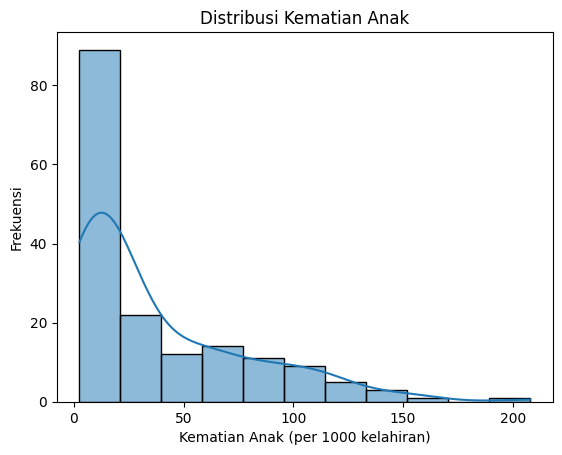

In [4]:
#visualisasi kematian anak di bawah usia 5 tahun per 1000 kelahiran
sns.histplot(data_negara['Kematian_anak'], kde=True)
plt.title('Distribusi Kematian Anak')
plt.xlabel('Kematian Anak (per 1000 kelahiran)')
plt.ylabel('Frekuensi')
plt.show()

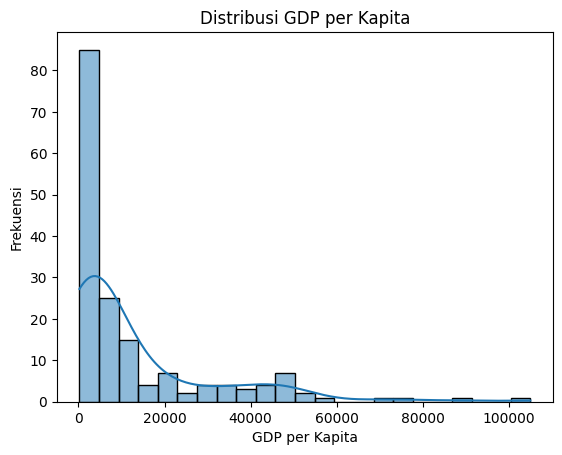

In [5]:
#visualisasi GDP per kapita
sns.histplot(data_negara['GDPperkapita'], kde=True)
plt.title('Distribusi GDP per Kapita')
plt.xlabel('GDP per Kapita')
plt.ylabel('Frekuensi')
plt.show()

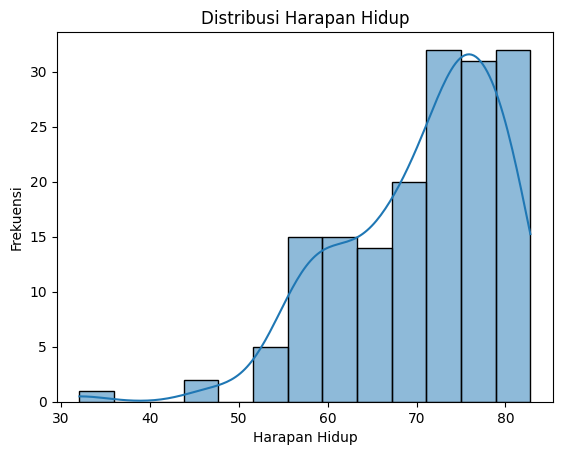

In [6]:
#visualisasi harapan hidup
sns.histplot(data_negara['Harapan_hidup'], kde=True)
plt.title('Distribusi Harapan Hidup')
plt.xlabel('Harapan Hidup')
plt.ylabel('Frekuensi')
plt.show()

In [8]:
from sklearn.cluster import KMeans

#memilih fitur yang akan digunakan untuk klastering
x = data_negara.drop(['Negara'], axis=1)

#menentukan jumlah klaster yang diinginkan
kmeans = KMeans(n_clusters=3)

#melakukan klastering
kmeans.fit(x)

#menambahkan label klaster ke dalam dataframe
data_negara['Cluster'] = kmeans.labels_

#menampilkan negara-negara dalam klaster
print(data_negara[['Negara', 'Cluster']])

                  Negara  Cluster
0            Afghanistan        1
1                Albania        1
2                Algeria        1
3                 Angola        1
4    Antigua and Barbuda        1
..                   ...      ...
162              Vanuatu        1
163            Venezuela        1
164              Vietnam        1
165                Yemen        1
166               Zambia        1

[167 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
#menampilkan statistik dari masing-masing klaster
numeric_columns=data_negara.select_dtypes(include=['float64', 'int64']).columns
cluster_stats=data_negara.groupby('Cluster')[numeric_columns].mean()
print(cluster_stats)

         Kematian_anak     Ekspor  Kesehatan      Impor    Pendapatan  \
Cluster                                                                 
0             8.800000  49.978125   8.991563  46.021875  37621.875000   
1            47.389844  35.865617   6.332031  45.921609   8569.242188   
2             6.228571  96.442857   5.712857  68.571429  80342.857143   

          Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
Cluster                                                           
0        3.383312      79.156250          1.944687  35587.500000  
1        8.957648      67.873437          3.263359   4438.390625  
2        6.388714      80.285714          1.767143  65442.857143  
